In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [9]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [10]:
# Read dataset

%%time
data_mart_path = 'data_mart.csv'

try:
    data_mart_df = pd.read_csv(data_mart_path)
except pd.errors.ParserError as e:
    print(f'Error while parsing CSV file: {e}')



data_mart_df.shape

<timed exec>:4: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1.21 s, sys: 340 ms, total: 1.55 s
Wall time: 1.59 s


(101350, 104)

In [11]:
pd.to_datetime(data_mart_df[data_mart_df.churned == 1].last_transaction_date, format="%d/%m/%Y").max()

Timestamp('2023-12-17 00:00:00')

In [12]:
data_mart_df.columns[:50]

Index(['toplevelcustomerid', 'client_account_number', 'credit_terms_requested', 'credit_terms_granted', 'company_type', 'cash_flow_score', 'credit_limit_requested', 'credit_limit_assigned', 'num_employees', 'fleet_size_declared', 'account_source', 'lead_type', 'domain_type', 'avg_retention_cases_per_year', 'avg_support_cases_per_year', 'avg_complaint_cases_per_year', 'start_date', 'num_live_cards', 'fuel_usage_flag', 'ev_usage_flag', 'rev_toll_usage_flag', 'servicepointepyx_usage_flag', 'kwikfit_usage_flag', 'bmm_usage_flag', 'beyondfuel_usage_flag', 'commercialdelphicreditlimit', 'commercialdelphiscore', 'numberofccjsinlast2years', 'lineofbusiness', 'last_transaction_date', 'tenure', 'fuel_active', 'visa_active', 'ev_active', 'fuel_sites_monthly_avg', 'total_fee_charge_monthly_avg', 'number_of_distinct_fees_monthly_avg', 'promo_group', 'number_of_web_users', 'number_of_logins_monthly_avg', 'siccode_sictext_1', 'mortgages_nummortcharges', 'age', 'companycategory', 'SIC code',
       's

In [13]:
data_mart_df.columns[50:]

Index(['nationality', 'pence_per_litre', 'Postcode prefix', 'Postcode district', 'UK region', 'country', 'county', 'Total_population_2011', 'Rural_including_hub_towns_rural_&_rural_related_population_as_%_of_Total_population_2011', 'RUC11CD', 'RUC11', 'tenure_months', 'total_litres_monthly_avg', 'non_dd_litres_monthly_avg', 'dd_litres_monthly_avg', 'total_transactions_monthly_avg', 'total_transactions_fuel_monthly_avg', 'total_transactions_non_visa_monthly_avg', 'total_transactions_visa_monthly_avg', 'total_spend_monthly_avg', 'fuel_spend_monthly_avg', 'non_fuel_spend_non_visa_monthly_avg', 'non_fuel_spend_visa_monthly_avg', 'total_ev_transactions_monthly_avg', 'total_ev_energy_charge_per_kwh_monthly_avg', 'total_ev_session_charge_per_minute_monthly_avg', 'ev_spend_monthly_avg', 'total_rev_monthly_avg', 'churned', 'CustomerType', 'survey_year', 'survey_product_satisfaction', 'survey_support_satisfaction', 'survey_product_issue_last_6_months', 'survey_documentation_satisfaction',
      

In [14]:
# Get columns containing 'life'
columns_containing_life = [col for col in data_mart_df.columns if 'declared' in col]
columns_containing_life

['fleet_size_declared']

In [15]:
data_mart_df[['total_spend_monthly_avg', 'total_transactions_monthly_avg', 'total_rev_monthly_avg', 'churned']].head()

,total_spend_monthly_avg,total_transactions_monthly_avg,total_rev_monthly_avg,churned
0,55.0,1.0,4,0
1,92.0,2.0,3,0
2,12.0,0.0,1,0
3,223.0,3.0,4,0
4,87.0,1.0,8,0


In [16]:
data_mart_df.total_spend_monthly_avg.value_counts()

total_spend_monthly_avg
0.0        2825
50.0        180
60.0        171
35.0        164
40.0        162
           ... 
6835.0        1
11490.0       1
4118.0        1
24744.0       1
25767.0       1
Name: count, Length: 7871, dtype: int64

In [17]:
data_mart_df.total_transactions_monthly_avg.value_counts()

total_transactions_monthly_avg
2.0       8453
1.0       7423
3.0       6168
4.0       6036
0.0       5964
          ... 
3026.0       1
1144.0       1
664.0        1
370.0        1
282.0        1
Name: count, Length: 802, dtype: int64

In [18]:
data_mart_df.total_rev_monthly_avg.value_counts()

total_rev_monthly_avg
0       25695
1        2257
2        2129
3        1962
4        1854
        ...  
2730        1
1510        1
1225        1
2074        1
1188        1
Name: count, Length: 1368, dtype: int64

In [19]:
data_mart_df.churned.value_counts()

churned
1    57250
0    44100
Name: count, dtype: int64

In [20]:
data_mart_df.describe()

,toplevelcustomerid,cash_flow_score,credit_limit_requested,credit_limit_assigned,num_employees,fleet_size_declared,avg_retention_cases_per_year,avg_support_cases_per_year,avg_complaint_cases_per_year,num_live_cards,fuel_usage_flag,ev_usage_flag,rev_toll_usage_flag,servicepointepyx_usage_flag,kwikfit_usage_flag,bmm_usage_flag,beyondfuel_usage_flag,commercialdelphicreditlimit,commercialdelphiscore,numberofccjsinlast2years,tenure,fuel_active,visa_active,ev_active,fuel_sites_monthly_avg,...,total_ev_session_charge_per_minute_monthly_avg,ev_spend_monthly_avg,total_rev_monthly_avg,churned,survey_year,survey_product_satisfaction,survey_support_satisfaction,survey_documentation_satisfaction,survey_valued_customer,survey_fuelcard_plus_expenses,survey_fleet_management,survey_national_fuel_network,survey_ev_payments,survey_fuel_discounts,survey_breakdown_cover,survey_parking,survey_online_account,survey_continue_using_product,survey_value_for_money,survey_comparison_to_other_companies,num_no_class_used,num_cars_used,num_lgv_used,num_hgv_used,num_total_vehicles_used
count,101350.000000,44328.000000,9.513400e+04,8.150700e+04,90781.000000,43016.000000,8858.000000,226.000000,448.000000,98657.000000,101350.000000,101350.000000,101350.000000,101350.000000,101350.000000,101350.000000,101350.000000,8.427200e+04,84215.000000,84970.000000,79154.000000,100774.000000,100774.000000,100774.000000,76216.000000,...,79154.000000,79154.000000,101350.000000,101350.000000,251.0,251.000000,210.000000,243.000000,234.000000,247.000000,229.000000,242.000000,211.000000,246.000000,233.000000,232.000000,245.000000,251.000000,251.000000,251.000000,38183.000000,38183.000000,38183.000000,38183.000000,38183.000000
mean,157434.234445,32.005459,6.704403e+03,3.393061e+03,124.060696,32.953668,1.312825,2.057522,1.189732,19.465471,0.798382,0.025673,0.083552,0.040493,0.003670,0.002437,0.075323,1.892084e+05,62.130738,0.086752,2297.457526,0.406146,0.029452,0.018953,14.381101,...,0.502741,8.384971,60.547222,0.564874,2023.0,7.649402,4.047619,4.251029,3.893162,4.967611,4.790393,8.516529,3.611374,8.650407,4.540773,4.573276,8.457143,4.330677,3.768924,3.266932,11.954666,3.699631,6.428122,0.393683,22.476102
std,69211.134098,31.840827,3.562270e+05,2.637361e+04,3020.387238,1248.216733,0.808820,5.660880,0.618276,377.954931,0.401210,0.158160,0.276716,0.197114,0.060473,0.049307,0.263913,9.347847e+05,26.917934,0.780471,2697.864346,0.491115,0.169071,0.136361,71.046618,...,38.850188,591.045442,297.581139,0.495776,0.0,2.797962,0.921627,0.861690,1.024023,4.034274,3.687306,2.368915,3.940107,2.265928,3.618596,3.760558,2.532413,1.130582,1.059429,0.807751,124.391035,30.401524,125.231315,5.720074,230.030855
min,4.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-7912.000000,-381.000000,0.000000,2023.0,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137582.250000,0.000000,0.000000e+00,5.000000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333e+02,41.000000,0.000000,279.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2023.0,7.000000,4.000000,4.000000,3.000000,0.000000,0.000000,8.000000,0.000000,8.000000,0.000000,0.000000,8.000000,4.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,179895.500000,24.000000,4.000000e+02,7.000000e+02,4.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.264286e+03,67.285714,0.000000,1029.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,16.000000,1.000000,2023.0,8.000000,4.000000,4.000000,4.000000,5.000000,5.000000,10.000000,1

In [21]:
# Method for reducing the memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [22]:
data_mart_df = reduce_mem_usage(data_mart_df)

Mem. usage decreased to 37.89 Mb (52.9% reduction)


In [23]:
data_mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101350 entries, 0 to 101349
Columns: 104 entries, toplevelcustomerid to num_total_vehicles_used
dtypes: float16(52), float32(16), int32(2), int8(8), object(26)
memory usage: 37.9+ MB


In [24]:
# Replace empty spaces of dataframe column names with  '_'
data_mart_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
# Replace uppercase characters of dataframe column names with lowercase
data_mart_df.columns = data_mart_df.columns.str.lower()

In [25]:
#Firmographic Lists
Company_identfier = ['Account_id', 'Customer_id', 'Company registration number', 'Sf_account_id', 'Company_name']

Company_size = ['Num_Employees', 'Fleet_size_declared', 'Num_Cars_used', 'Num_Vans_used', 'Num_HGV_used',
                'Num_Cars_declared', 'Num_Vans_declared', 'Num_HGV_declared', 'Estimated_monthly_fuel_spend',
                'estimated_monthly_other_spend__c']

Location = ['PostCode', 'PostCodeArea', 'County', 'Region', 'Country', 'Population', 'Rural_pct', 'Urban_score',
            'Num_FLTSites_Within_3_Mile', 'Num_DDSites_Within_3_Mile', 'Frac_DDSites_Within_3_Mile']

Industry = ['SIC Code', 'SIC Section', 'SIC Division']

Sales_Funnel = ['Customer_funnel_stage']

Company_Admin = ['Company_Type', 'Company_Age', 'Has_insolvency', 'Number of contacts', 'Contact_role', 'Contact_email_domain',
                 'Avg_Director_age', 'Mode_Director_nationality', 'Avg_Director_tenure', 'Num_directors_over_time']

Credit = ['Delphi_score', 'Cash_Flow_Score', 'Credit_limit_requested', 'Credit_terms_requested', 'Credit_limit_granted',
          'Credit_terms_granted', 'Num_CCJ_LTM', 'Num_Charges_LTM', 'Num_Searches_LTM', 'Num_DBT_LTM']

Balance_Sheet = ['Total_Assets', 'Total_Liabilities', 'Current_assets', 'Current_liabilities', 'Turnover', 'Turnover_growth']

In [26]:
# Replace empty spaces of list items with  '_' and make them lowercase

def rename_list_items(column_list):
    processed_columns = [col.replace(' ', '_').lower() for col in column_list]
    return processed_columns

In [27]:
Company_identfier = rename_list_items(Company_identfier)
Company_size = rename_list_items(Company_size)
Location = rename_list_items(Location)
Industry = rename_list_items(Industry)
Sales_Funnel = rename_list_items(Sales_Funnel)
Company_Admin = rename_list_items(Company_Admin)
Credit = rename_list_items(Credit)
Balance_Sheet = rename_list_items(Balance_Sheet)
print(Company_identfier)


['account_id', 'customer_id', 'company_registration_number', 'sf_account_id', 'company_name']


In [28]:
data_mart_df.iloc[:, :50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101350 entries, 0 to 101349
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   toplevelcustomerid                   101350 non-null  int32  
 1   client_account_number                101350 non-null  object 
 2   credit_terms_requested               57050 non-null   object 
 3   credit_terms_granted                 40329 non-null   object 
 4   company_type                         40684 non-null   object 
 5   cash_flow_score                      44328 non-null   float16
 6   credit_limit_requested               95134 non-null   float32
 7   credit_limit_assigned                81507 non-null   float32
 8   num_employees                        90781 non-null   float32
 9   fleet_size_declared                  43016 non-null   float32
 10  account_source                       97520 non-null   object 
 11  lead_type    

In [29]:
data_mart_df.iloc[:, 50:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101350 entries, 0 to 101349
Data columns (total 54 columns):
 #   Column                                                                                    Non-Null Count   Dtype  
---  ------                                                                                    --------------   -----  
 0   nationality                                                                               53692 non-null   object 
 1   pence_per_litre                                                                           81360 non-null   float16
 2   postcode_prefix                                                                           63615 non-null   object 
 3   postcode_district                                                                         63577 non-null   object 
 4   uk_region                                                                                 63577 non-null   object 
 5   country                                     

In [30]:
data_mart_df.select_dtypes(include=['object']).head()

,client_account_number,credit_terms_requested,credit_terms_granted,company_type,account_source,lead_type,domain_type,start_date,lineofbusiness,last_transaction_date,promo_group,siccode_sictext_1,companycategory,section,division,nationality,postcode_prefix,postcode_district,uk_region,country,county,ruc11,customertype,survey_product_issue_last_6_months,survey_hybrid_fleet_percentage,survey_ev_fleet_percentage
0,LAC29892001,NaN,NaN,NaN,3rd Party - Murco Local Account,NaN,personal,01/02/2001,AllStar,02/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LAC29948001,NaN,NaN,NaN,3rd Party - Murco Local Account,NaN,commercial,06/02/2001,AllStar,28/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LAC29949001,NaN,NaN,NaN,3rd Party - Murco Local Account,NaN,personal,06/02/2001,AllStar,12/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LAC29950001,NaN,NaN,NaN,3rd Party - Murco Local Account,NaN,personal,06/02/2001,AllStar,22/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28709954,NaN,NaN,NaN,Visa Upsell,NaN,personal,15/02/2004,AllStar,26/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
col_list = []
for col in data_mart_df.select_dtypes(include=['object']).columns:
  #print(col, " : \n")
  if (data_mart_df[col].nunique() < 15):
    col_list.append(col)
print(col_list)

['company_type', 'domain_type', 'lineofbusiness', 'promo_group', 'companycategory', 'uk_region', 'country', 'ruc11', 'customertype', 'survey_product_issue_last_6_months', 'survey_hybrid_fleet_percentage', 'survey_ev_fleet_percentage']


In [32]:
data_mart_df.survey_ev_fleet_percentage.unique()

array([nan, '0%', '1% to 25%', '51% to 75%', '26% to 50%',
       'More than 75%'], dtype=object)

In [33]:
data_mart_df[data_mart_df.promo_group == '06/04/2002'].shape

(1795, 104)

In [34]:
# Create a dictionary to merge similar values
company_type_merge_dict = {
    'Limited (LTD)': 'Limited',
    'Partnership – 3 or less': 'Partnership',
    'Partnership – 4 or more': 'Partnership',
}

# Merge similar values using the dictionary
data_mart_df['company_type'] = data_mart_df['company_type'].replace(company_type_merge_dict)
#data_mart_df['company_type'].fillna('Other', inplace=True)

# Display unique values
print(data_mart_df['company_type'].unique())


[nan 'Limited' 'Other' 'Public Limited Company (PLC)' 'Sole Trader'
 'Partnership' 'Council/Charity']


In [35]:
companycategory_merge_dict = {
    'PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)': 'Private Limited Company',
    "PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)": 'Private Limited Company',
    'PRIV LTD SECT. 30 (Private limited company, section 30 of the Companies Act)': 'Private Limited Company'
}

# Merge similar values using the dictionary
data_mart_df['companycategory'] = data_mart_df['companycategory'].replace(companycategory_merge_dict)
# Display unique values
print(data_mart_df['company_type'].unique())


[nan 'Limited' 'Other' 'Public Limited Company (PLC)' 'Sole Trader'
 'Partnership' 'Council/Charity']


In [36]:
# Creating a dictionary to merge similar values
uk_region_merge_dict = {
    'East of England': 'East England',
    'East Midlands': 'East England',
}

# Merging similar values using the dictionary
data_mart_df['uk_region'] = data_mart_df['uk_region'].replace(uk_region_merge_dict)

In [37]:
# Creating a dictionary to merge similar values and shorten names
ruc11_merge_dict = {
    '3_Urban with Significant Rural (rural including hub towns 26-49%)': 'Urban with Significant Rural',
    '2_Largely Rural (rural including hub towns 50-79%) ': 'Largely Rural',
    '6_Urban with Major Conurbation': 'Urban with Major Conurbation',
    '4_Urban with City and Town': 'Urban with City and Town'
}

# Merging similar values and shortening names using the dictionary
data_mart_df['ruc11'] = data_mart_df['ruc11'].replace(ruc11_merge_dict)

In [39]:
data_mart_df.total_rev_monthly_avg.min(), data_mart_df.total_rev_monthly_avg.mean(), data_mart_df.total_rev_monthly_avg.max()

(-381, 60.54722249629995, 34584)

In [40]:
data_mart_df[data_mart_df.total_rev_monthly_avg == 0].shape

(25695, 104)

In [41]:
# Create bins for 'total_rev_monthly_avg'
bins = [data_mart_df['total_rev_monthly_avg'].min(),
        -1,
        0.1,
        data_mart_df['total_rev_monthly_avg'].mean(),
        data_mart_df['total_rev_monthly_avg'].mean() + data_mart_df['total_rev_monthly_avg'].std(),
        data_mart_df['total_rev_monthly_avg'].max()]

# Split dataset acording to the bins
bins_df = pd.cut(data_mart_df['total_rev_monthly_avg'], bins=bins)

# Create groups with bins
data_set_size = data_mart_df.groupby(bins_df).size().reset_index(name='count')

print("Bins and sizes:")
print(data_set_size)


Bins and sizes:
  total_rev_monthly_avg  count
0        (-381.0, -1.0]     87
1           (-1.0, 0.1]  25695
2         (0.1, 60.547]  53025
3     (60.547, 358.128]  19925
4    (358.128, 34584.0]   2617


In [42]:
# Calculate summary statistics
summary_stats = data_mart_df.describe()
print(summary_stats)

       toplevelcustomerid  cash_flow_score  credit_limit_requested  credit_limit_assigned  num_employees  fleet_size_declared  avg_retention_cases_per_year  avg_support_cases_per_year  avg_complaint_cases_per_year  num_live_cards  fuel_usage_flag  ev_usage_flag  rev_toll_usage_flag  servicepointepyx_usage_flag  kwikfit_usage_flag  bmm_usage_flag  beyondfuel_usage_flag  commercialdelphicreditlimit  commercialdelphiscore  numberofccjsinlast2years   tenure  fuel_active  visa_active  ev_active  fuel_sites_monthly_avg  ...  total_ev_session_charge_per_minute_monthly_avg  ev_spend_monthly_avg  total_rev_monthly_avg        churned  survey_year  survey_product_satisfaction  survey_support_satisfaction  survey_documentation_satisfaction  survey_valued_customer  survey_fuelcard_plus_expenses  survey_fleet_management  survey_national_fuel_network  survey_ev_payments  survey_fuel_discounts  survey_breakdown_cover  survey_parking  survey_online_account  survey_continue_using_product  \
count       

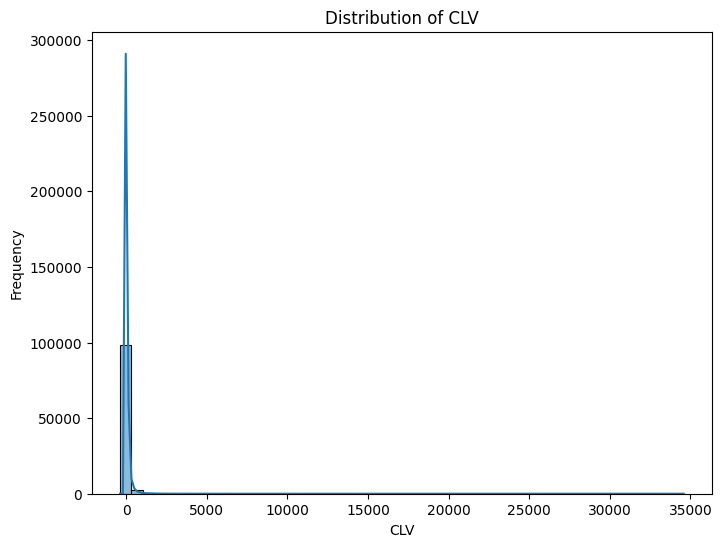

In [43]:
# Visualize distribution of CLV
plt.figure(figsize=(8, 6))
sns.histplot(data=data_mart_df, x='total_rev_monthly_avg', bins=50, kde=True)
plt.title('Distribution of CLV')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

In [44]:
data_mart_df.credit_terms_granted.unique()

array([nan, '7+7', '7+14', 'Other', '14+28', 'Monthly+7', '14+14',
       '14+21', '14+7', '7+21', '7+Monthly', 'Monthly + 37',
       'Weekly + 10', 'Monthly + 30', 'Monthly + 14', '30+7',
       'Fortnightly + 10', 'Monthly + 15', 'Monthly + 28', 'Monthly + 21',
       'Weekly + 28', 'Weekly + 30', 'Fortnightly + 30', '7+5',
       'Monthly + 10'], dtype=object)

In [45]:
data_mart_df.company_type.unique()

array([nan, 'Limited', 'Other', 'Public Limited Company (PLC)',
       'Sole Trader', 'Partnership', 'Council/Charity'], dtype=object)

In [46]:
data_mart_df.lead_type.unique()

array([nan, 'Incoming Call', 'E2E Direct Application', 'Contact Us',
       'Request A Callback', 'Keyfuels - Sale Enquiry', 'PPC quote',
       'EV PPC', 'Direct Application', 'Fleet Verified', 'Data',
       'E2E Direct Application - EV', 'Incomplete Application',
       'PPC Landing Page', 'Quick Quote', 'Exit Pop',
       'VISA Direct Application', 'VISA E2E Direct Application',
       'Quick Quote Visa', 'EV Quick Quote', 'Test',
       'Expense Request A Callback', 'Digital Promotion',
       'Incoming Email', 'Experian - Manufacturing', 'Servicepoint',
       'Experian - Retail', 'Experian - Business Services',
       'Experian - Construction', 'Experian - Wholesale', 'VISA',
       'VBR Callback Request', 'Experian - Transport', 'Call Back',
       'BLANK', 'Experian - Public services', 'Facebook',
       'VISA Incomplete Application', 'EV Facebook', 'New Partner Member',
       'Keyfuels - Contact Us', 'Keyfuels - Calculate Savings',
       'VISA E2E Referral', 'VISA E2E Incom

In [47]:
data_mart_df.avg_complaint_cases_per_year.unique()

array([nan,  1.,  2.,  4.,  3.,  5.,  8.], dtype=float16)

In [48]:
data_mart_df.survey_product_satisfaction.unique()

array([nan,  7., 10.,  9.,  5.,  8.,  1.,  0.,  4.,  3.,  6.,  2.],
      dtype=float16)

In [49]:
# Check for missing values
missing_values = data_mart_df.isnull().sum()
missing_percentage = (missing_values / len(data_mart_df)) * 100
print(pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage']))


                                                    Missing Values  Percentage
toplevelcustomerid                                               0    0.000000
client_account_number                                            0    0.000000
credit_terms_requested                                       44300   43.709916
credit_terms_granted                                         61021   60.208189
company_type                                                 60666   59.857918
cash_flow_score                                              57022   56.262457
credit_limit_requested                                        6216    6.133202
credit_limit_assigned                                        19843   19.578688
num_employees                                                10569   10.428219
fleet_size_declared                                          58334   57.556981
account_source                                                3830    3.778984
lead_type                                           

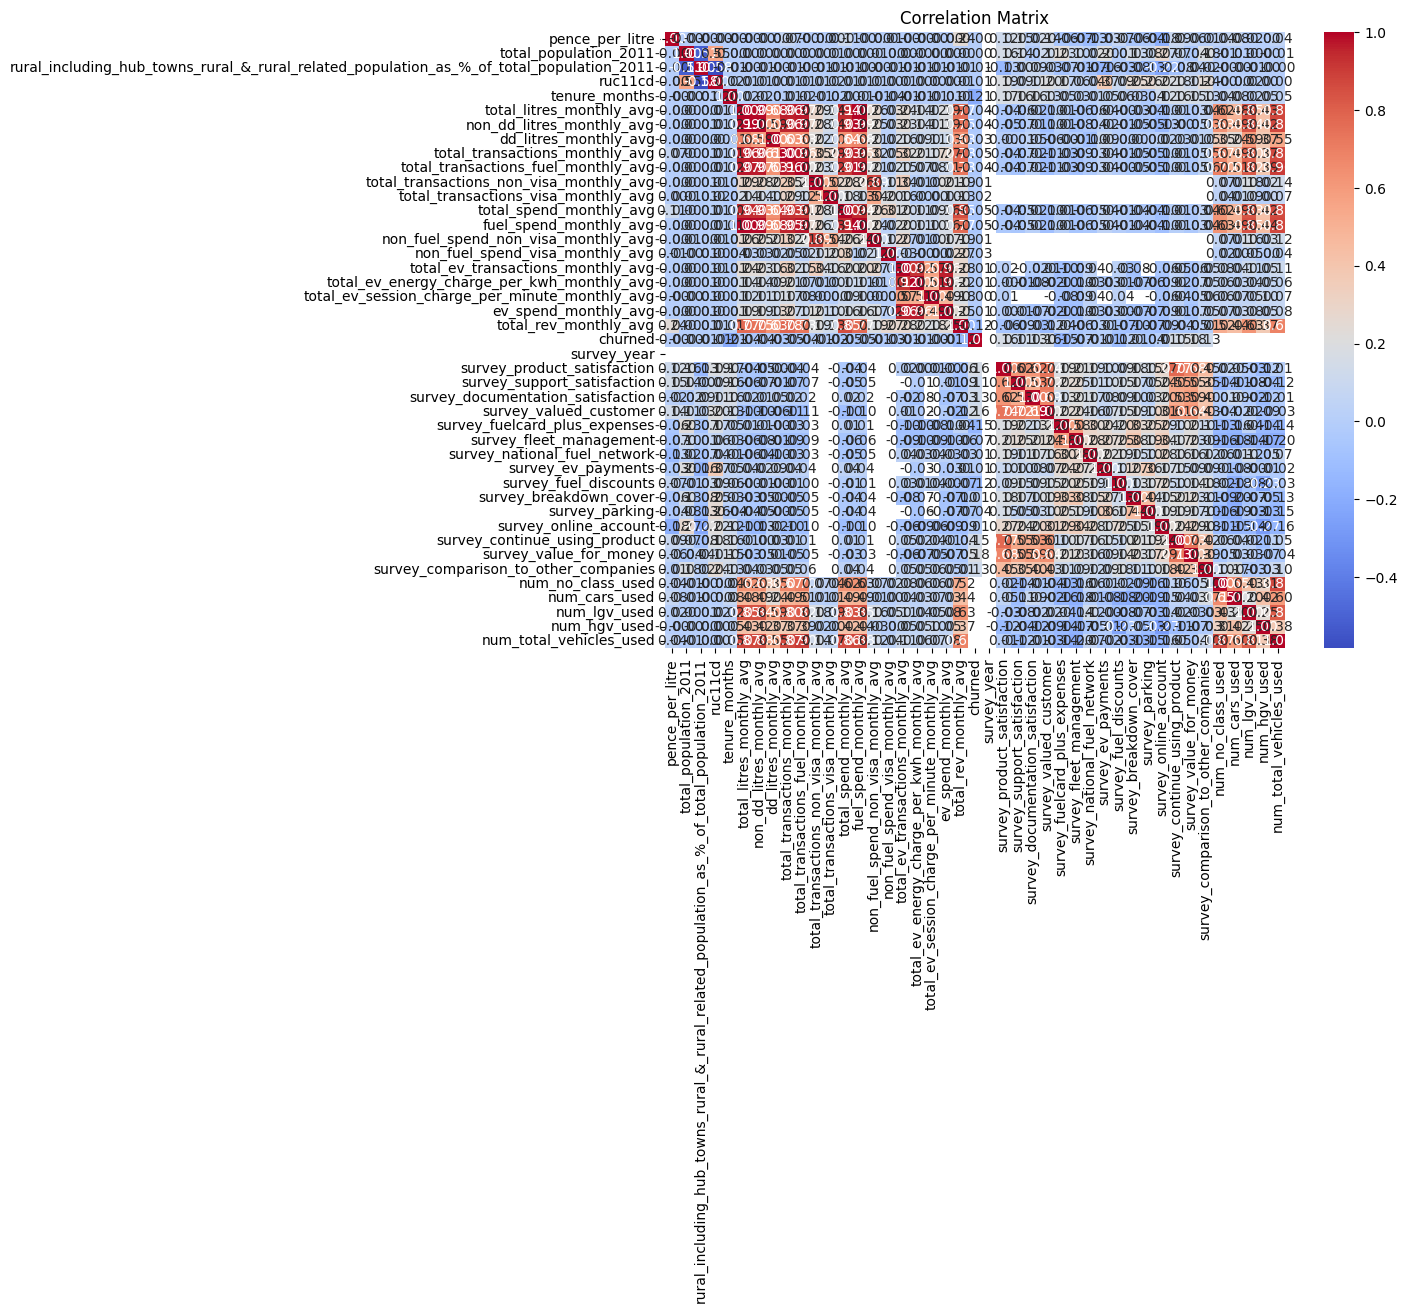

In [50]:
# Compute correlation matrix
correlation_matrix = data_mart_df.iloc[:, 50:].select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


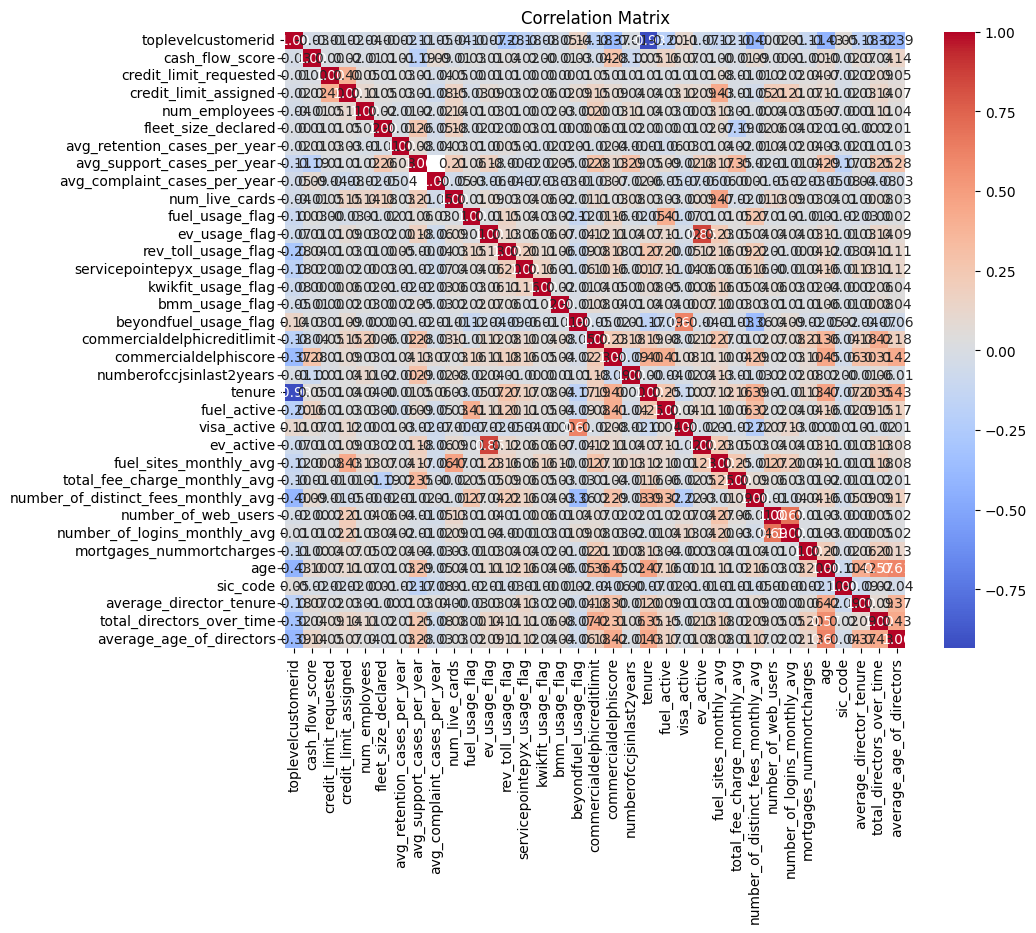

In [51]:
# Compute correlation matrix
correlation_matrix = data_mart_df.iloc[:, :50].select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

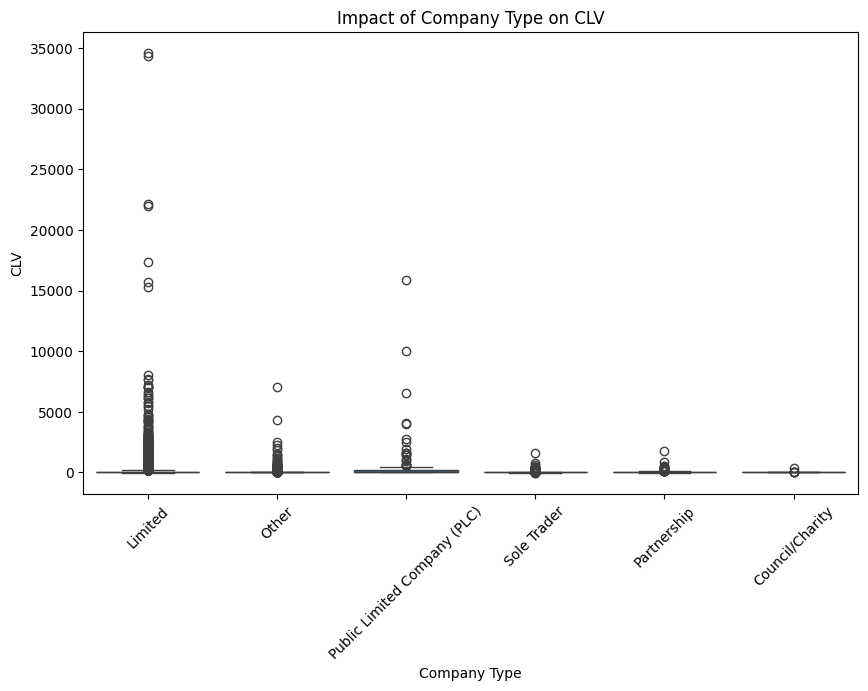

In [52]:
# Visualize categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_mart_df, x='company_type', y='total_rev_monthly_avg')
plt.title('Impact of Company Type on CLV')
plt.xlabel('Company Type')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()


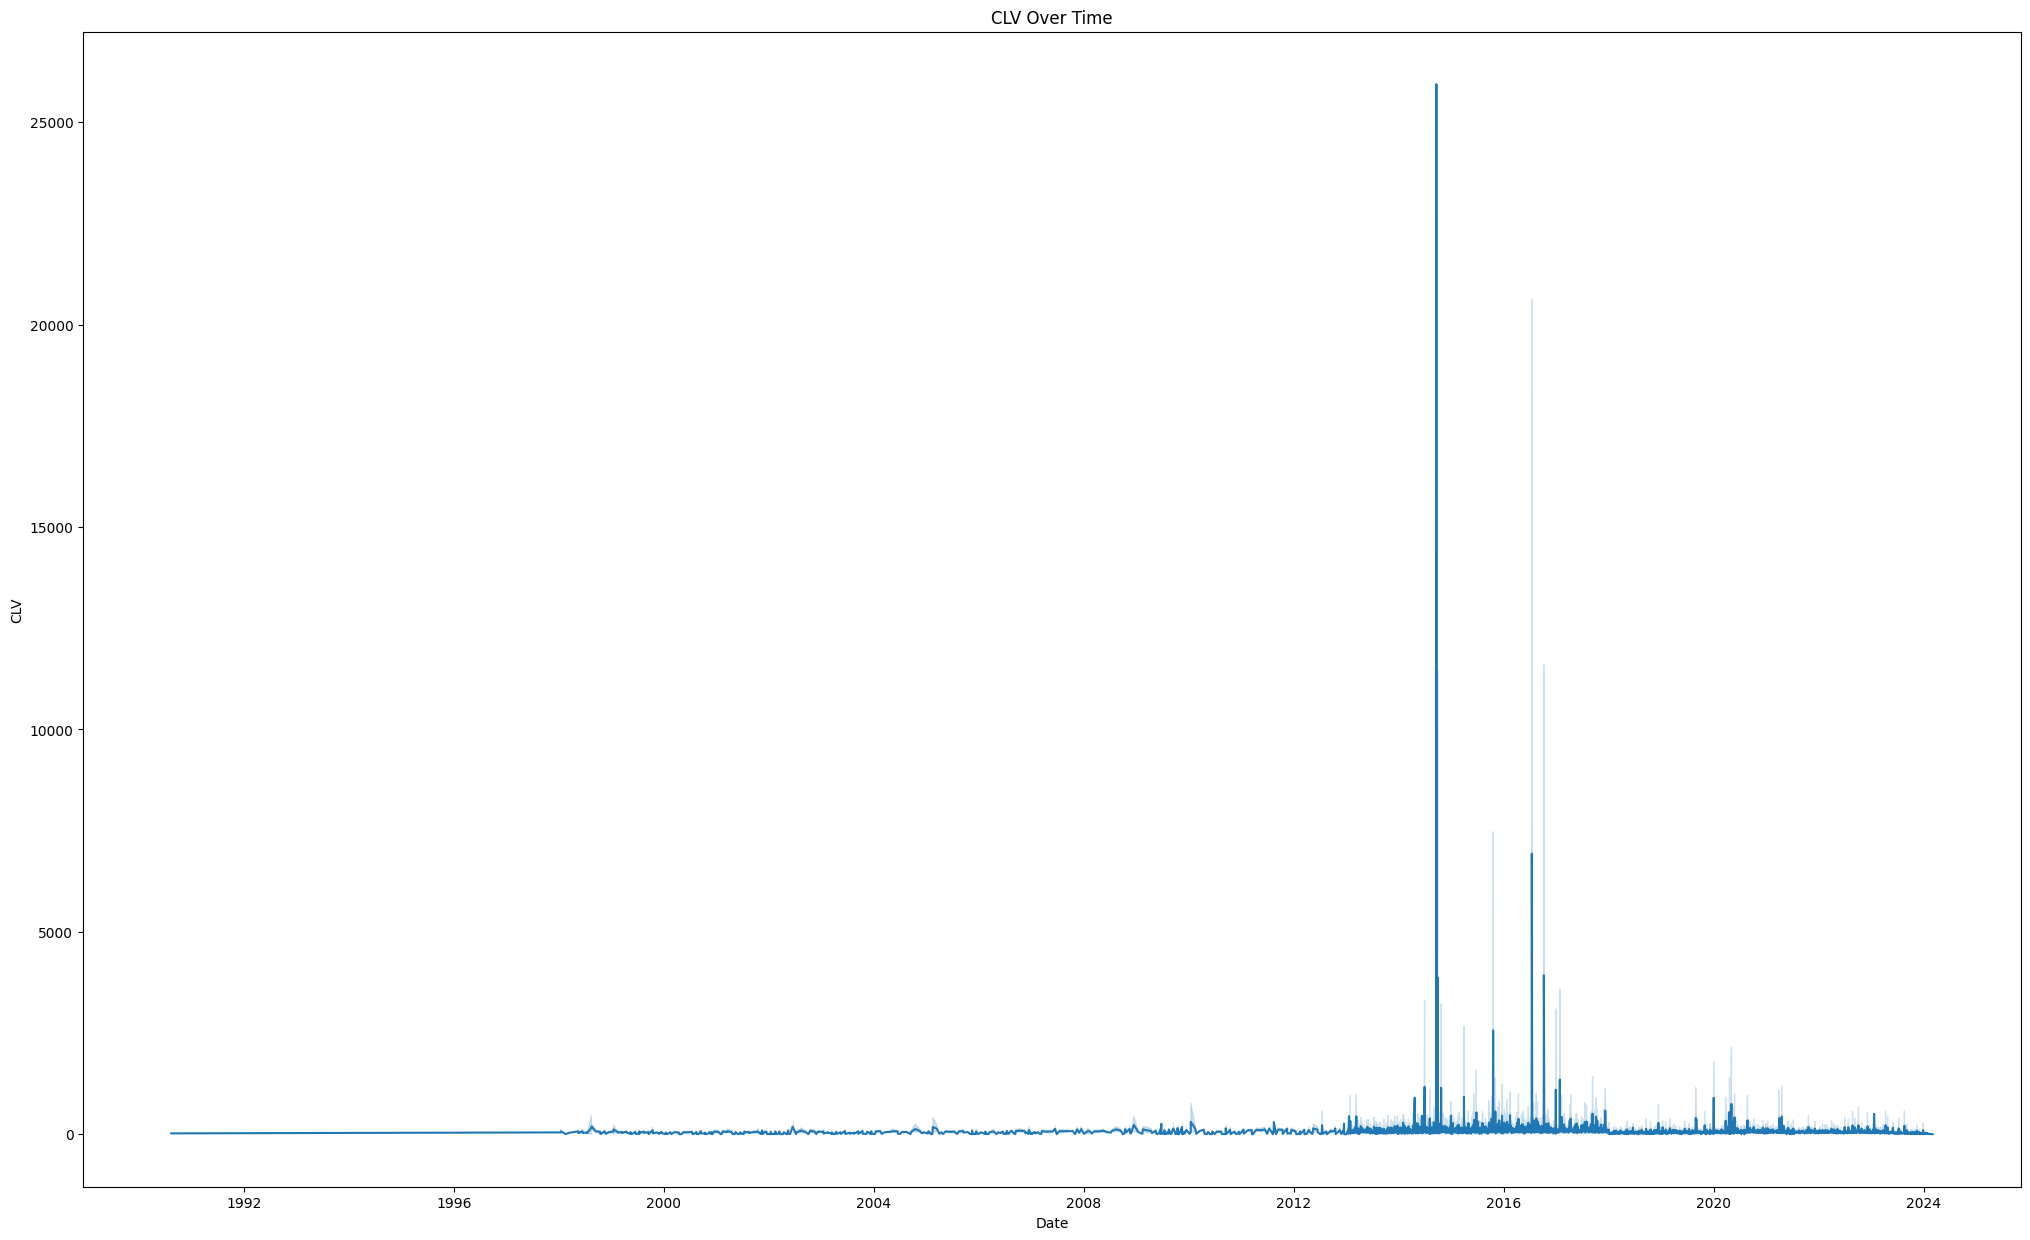

CPU times: user 1min 15s, sys: 1.06 s, total: 1min 16s
Wall time: 1min 17s


In [53]:
%%time
# Convert start_date to datetime
data_mart_df_2 = data_mart_df.copy()
data_mart_df_2['start_date'] = pd.to_datetime(data_mart_df_2['start_date'], format='%d/%m/%Y')
# Plot CLV over time
plt.figure(figsize=(25, 15))
sns.lineplot(data=data_mart_df_2, x='start_date', y='total_rev_monthly_avg')
plt.title('CLV Over Time')
plt.xlabel('Date')
plt.ylabel('CLV')
plt.show()


In [54]:
data_mart_df_2['start_date'].min(), data_mart_df_2['start_date'].max()

(Timestamp('1990-08-13 00:00:00'), Timestamp('2024-03-04 00:00:00'))

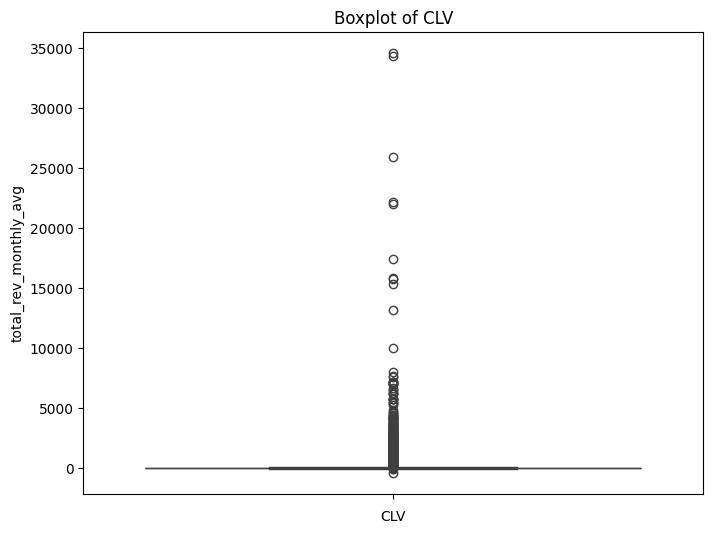

In [55]:
# Visualize outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_mart_df['total_rev_monthly_avg'])
plt.title('Boxplot of CLV')
plt.xlabel('CLV')
plt.show()


In [56]:
# Segment customers based on company type
segmented_data = data_mart_df.groupby('company_type')['total_rev_monthly_avg'].mean().reset_index()
segmented_data.sort_values(by='total_rev_monthly_avg', ascending=False, inplace=True)
print(segmented_data)


                   company_type  total_rev_monthly_avg
4  Public Limited Company (PLC)             451.916667
1                       Limited              90.745225
3                   Partnership              45.634796
2                         Other              42.261299
0               Council/Charity              15.725490
5                   Sole Trader              15.490651


In [57]:
# Create a new feature for tenure in months
data_mart_df_2['month_diff'] = np.ceil((pd.to_datetime('today') - pd.to_datetime(data_mart_df_2['start_date'])).dt.days / 30)
data_mart_df_2['year_diff'] = np.ceil((pd.to_datetime('today') - pd.to_datetime(data_mart_df_2['start_date'])).dt.days / 365)


data_mart_df_2['month_diff'].value_counts()

month_diff
22.0     1483
23.0     1470
26.0     1460
76.0     1379
27.0     1310
         ... 
269.0       3
201.0       1
318.0       1
319.0       1
411.0       1
Name: count, Length: 319, dtype: int64

In [58]:
data_mart_df_2['year_diff'].value_counts().sort_index()

year_diff
1.0     10223
2.0     14180
3.0     13908
4.0      9685
5.0      9774
6.0     11064
7.0      5609
8.0      2568
9.0      1878
10.0     1477
11.0     1923
12.0     1612
13.0     1814
14.0     1124
15.0      685
16.0      854
17.0     1102
18.0     1147
19.0     1157
20.0     1225
21.0      957
22.0      527
23.0     1420
24.0      892
25.0     1822
26.0     1924
27.0      222
34.0        1
Name: count, dtype: int64

In [59]:
# Calculate churn rate
churn_rate = data_mart_df['churned'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)


Churn Rate:
 churned
1    56.48742
0    43.51258
Name: proportion, dtype: float64


In [61]:
# Churned customers based on company type
churned_data = data_mart_df.groupby('churned')['total_rev_monthly_avg'].mean().reset_index()
churned_data.sort_values(by='total_rev_monthly_avg', ascending=False, inplace=True)
print(churned_data)


   churned  total_rev_monthly_avg
0        0             101.498367
1        1              29.002323


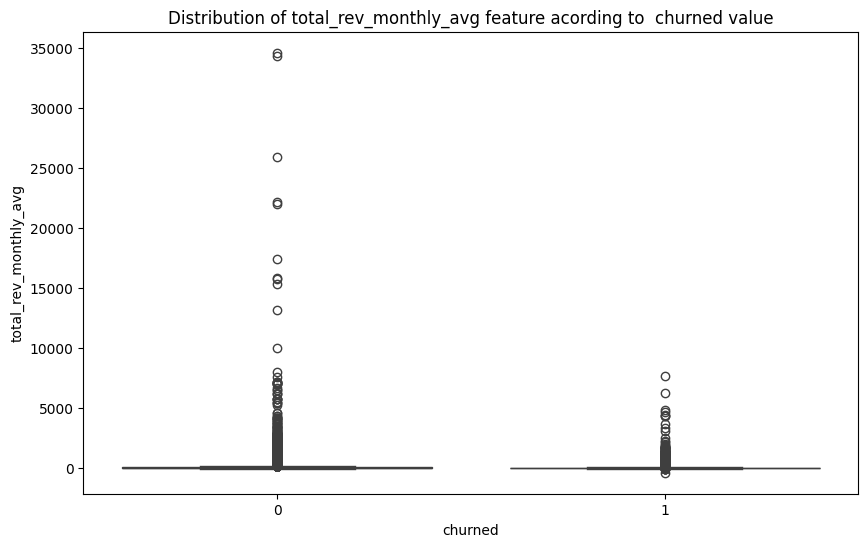

In [ ]:
# visualize the distribution of the 'total_rev_monthly_avg' feature by grouping it according to the 'churned' feature.
plt.figure(figsize=(10, 6))
sns.boxplot(x='churned', y='total_rev_monthly_avg', data=data_mart_df)
plt.title('Distribution of total_rev_monthly_avg feature acording to  churned value')
plt.xlabel('churned')
plt.ylabel('total_rev_monthly_avg')
plt.show()

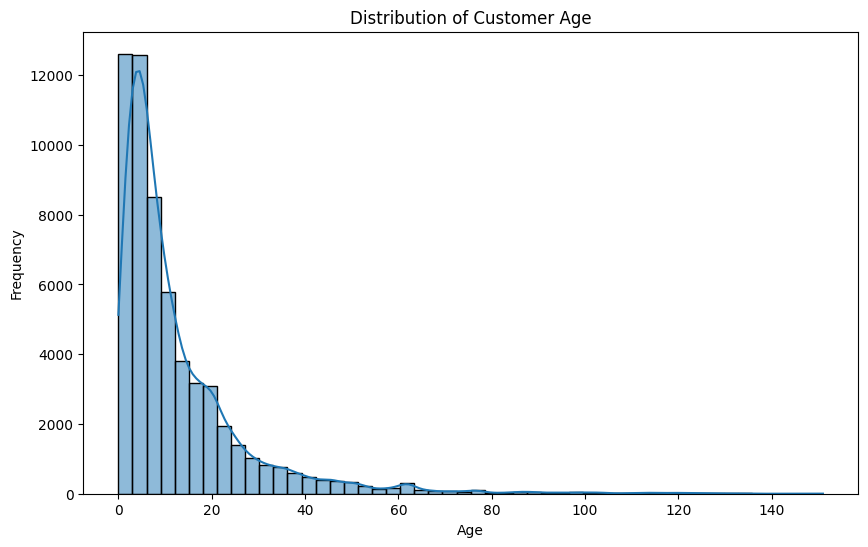

In [ ]:
# Visualize customer age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data_mart_df, x='age', bins=50, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


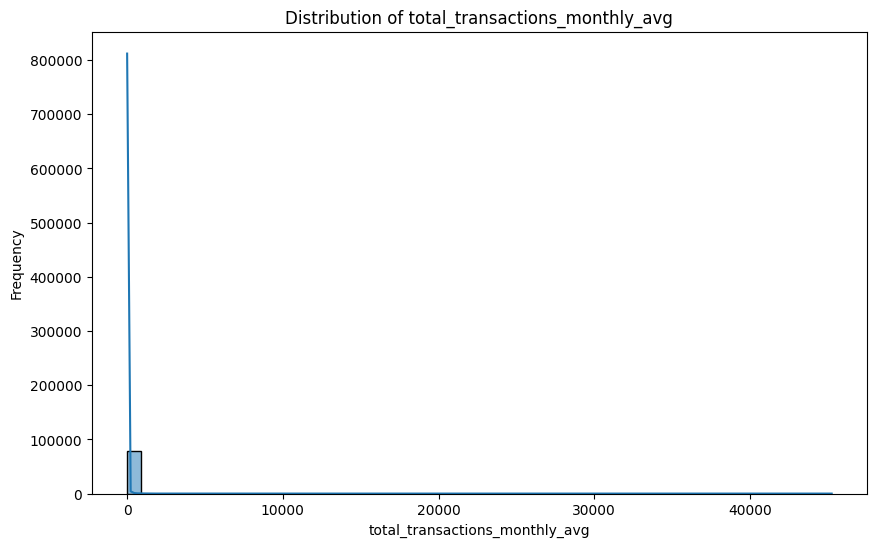

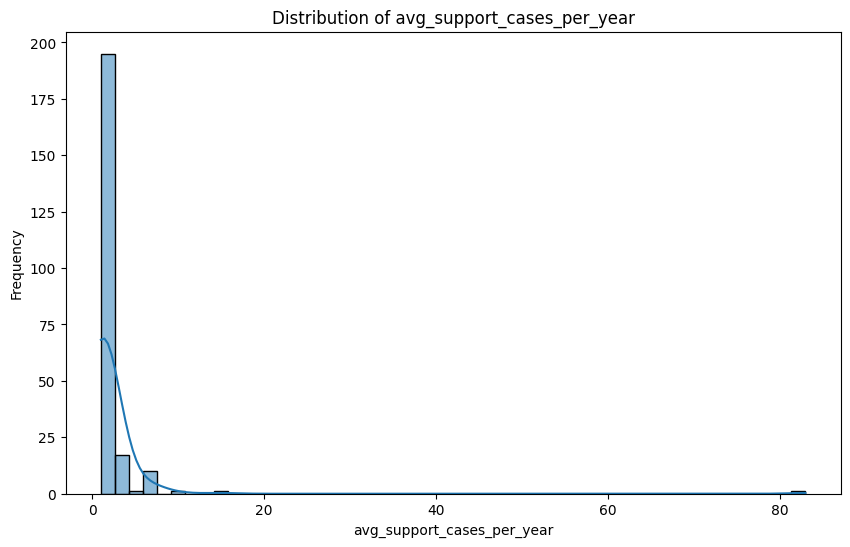

In [ ]:
# Analyze customer engagement metrics
engagement_metrics = ['total_transactions_monthly_avg', 'avg_support_cases_per_year']
for metric in engagement_metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_mart_df, x=metric, bins=50, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# Calculate retention rate
retention_rate = data_mart_df['avg_retention_cases_per_year'].mean()
print("Average Retention Rate:", retention_rate)


Average Retention Rate: 1.3125


In [ ]:
data_mart_df_2.select_dtypes(exclude=['object']).head()

,toplevelcustomerid,cash_flow_score,credit_limit_requested,credit_limit_assigned,num_employees,fleet_size_declared,avg_retention_cases_per_year,avg_support_cases_per_year,avg_complaint_cases_per_year,start_date,num_live_cards,fuel_usage_flag,ev_usage_flag,rev_toll_usage_flag,servicepointepyx_usage_flag,kwikfit_usage_flag,bmm_usage_flag,beyondfuel_usage_flag,commercialdelphicreditlimit,commercialdelphiscore,numberofccjsinlast2years,tenure,fuel_active,visa_active,ev_active,...,total_rev_monthly_avg,churned,survey_year,survey_product_satisfaction,survey_support_satisfaction,survey_documentation_satisfaction,survey_valued_customer,survey_fuelcard_plus_expenses,survey_fleet_management,survey_national_fuel_network,survey_ev_payments,survey_fuel_discounts,survey_breakdown_cover,survey_parking,survey_online_account,survey_continue_using_product,survey_value_for_money,survey_comparison_to_other_companies,num_no_class_used,num_cars_used,num_lgv_used,num_hgv_used,num_total_vehicles_used,month_diff,year_diff
0,100000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2001-02-01,2.0,1,0,0,0,0,0,0,1083.333374,75.3125,0.0,8400.0,1.0,0.0,0.0,...,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.0,24.0
1,100003,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,2001-02-06,5.0,1,0,0,0,0,0,0,1250.000000,82.0000,0.0,8424.0,1.0,0.0,0.0,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,2.0,283.0,24.0
2,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-02-06,2.0,1,0,0,0,0,0,0,NaN,NaN,NaN,8408.0,1.0,0.0,0.0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.0,24.0
3,100005,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2001-02-06,12.0,1,0,0,0,0,0,0,906.250000,54.1250,0.0,8416.0,1.0,0.0,0.0,...,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0,0.0,3.0,283.0,24.0
4,10002,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,2004-02-15,1.0,1,0,0,0,0,0,0,8757.142578,83.3125,0.0,7316.0,1.0,0.0,0.0,...,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,246.0,21.0


In [ ]:
data_mart_df_2.columns.get_loc('total_rev_monthly_avg')

77

In [ ]:
data_mart_df_2.columns.to_list()[77]

'total_rev_monthly_avg'

In [ ]:
%%time
# Calculating correlation
#corr_df = corr_df[cols_4_corr].copy()
corr_df = data_mart_df_2.select_dtypes(exclude=['object']).corr()


df_corr = corr_df[corr_df.columns.to_list()[:77] + corr_df.columns.to_list()[78:] + [corr_df.columns.to_list()[77]]]

corr = df_corr.corr()
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.5
top_corr_columns = cr.loc[:, 'total_rev_monthly_avg'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.5].sort_values(ascending=False)


len(best_accurate_columns)

CPU times: user 1.64 s, sys: 6.76 ms, total: 1.65 s
Wall time: 1.67 s


16

In [ ]:
best_accurate_columns

total_rev_monthly_avg                  1.000000
total_spend_monthly_avg                0.978272
total_transactions_monthly_avg         0.967163
total_litres_monthly_avg               0.965213
fuel_spend_monthly_avg                 0.964226
non_dd_litres_monthly_avg              0.963872
total_transactions_fuel_monthly_avg    0.957815
fuel_sites_monthly_avg                 0.941392
num_total_vehicles_used                0.940556
dd_litres_monthly_avg                  0.933786
num_lgv_used                           0.925018
num_live_cards                         0.911941
num_no_class_used                      0.897003
num_cars_used                          0.760378
credit_limit_assigned                  0.668103
survey_online_account                 -0.508473
Name: total_rev_monthly_avg, dtype: float64

In [ ]:
# Select features with correlation greater than 0.5
high_correlation_features = []
for col in corr.columns:
    high_correlation_features.extend(corr.index[corr[col].abs() > 0.99].tolist())

# Remove duplicated features and 'total_rev_monthly_avg'
high_correlation_features = list(set(high_correlation_features) - {'total_rev_monthly_avg'})
print(high_correlation_features)

# Select the feature with the highest correlation with 'total_rev_monthly_avg'
highest_corr_feature = None
max_corr = -1
for feature in high_correlation_features:
    corr_value = corr.loc['total_rev_monthly_avg', feature]
    if corr_value > max_corr:
        max_corr = corr_value
        highest_corr_feature = feature

print("Feature with the highest correlation with 'total_rev_monthly_avg':", highest_corr_feature)


['visa_active', 'kwikfit_usage_flag', 'pence_per_litre', 'beyondfuel_usage_flag', 'start_date', 'toplevelcustomerid', 'avg_complaint_cases_per_year', 'fuel_active', 'survey_breakdown_cover', 'ev_active', 'sic_code', 'numberofccjsinlast2years', 'survey_fleet_management', 'churned', 'mortgages_nummortcharges', 'survey_parking', 'survey_online_account', 'credit_limit_requested', 'total_transactions_non_visa_monthly_avg', 'survey_fuel_discounts', 'survey_ev_payments', 'non_fuel_spend_visa_monthly_avg', 'year_diff', 'avg_support_cases_per_year', 'num_no_class_used', 'commercialdelphicreditlimit', 'num_employees', 'fuel_sites_monthly_avg', 'credit_limit_assigned', 'survey_national_fuel_network', 'survey_support_satisfaction', 'servicepointepyx_usage_flag', 'num_lgv_used', 'fleet_size_declared', 'total_directors_over_time', 'survey_value_for_money', 'ev_spend_monthly_avg', 'avg_retention_cases_per_year', 'average_director_tenure', 'num_cars_used', 'total_population_2011', 'survey_comparison_t

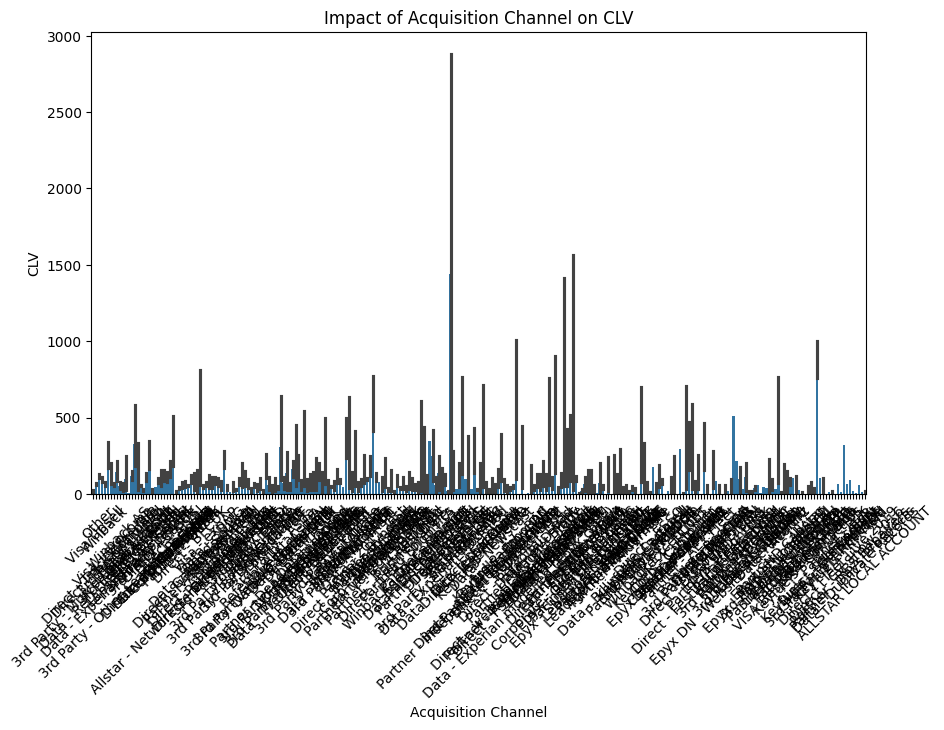

In [ ]:
# Analyze customer acquisition channels
plt.figure(figsize=(10, 6))
sns.barplot(data=data_mart_df, x='account_source', y='total_rev_monthly_avg')
plt.title('Impact of Acquisition Channel on CLV')
plt.xlabel('Acquisition Channel')
plt.ylabel('CLV')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data_mart_df_2.account_source.nunique()

260

In [ ]:
data_mart_df_2.select_dtypes(exclude=['object', 'datetime64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101350 entries, 0 to 101349
Data columns (total 80 columns):
 #   Column                                                                                    Non-Null Count   Dtype  
---  ------                                                                                    --------------   -----  
 0   toplevelcustomerid                                                                        101350 non-null  int32  
 1   cash_flow_score                                                                           44328 non-null   float16
 2   credit_limit_requested                                                                    95134 non-null   float32
 3   credit_limit_assigned                                                                     81507 non-null   float32
 4   num_employees                                                                             90781 non-null   float32
 5   fleet_size_declared                         

In [ ]:
# Train XGBoost model to determine feature importance
import xgboost as xgb

X = data_mart_df_2.select_dtypes(exclude=['object', 'datetime64']).drop(columns=['total_rev_monthly_avg'])
y = data_mart_df_2['total_rev_monthly_avg']

# Convert DataFrame to DMatrix format
dtrain = xgb.DMatrix(X, label=y)

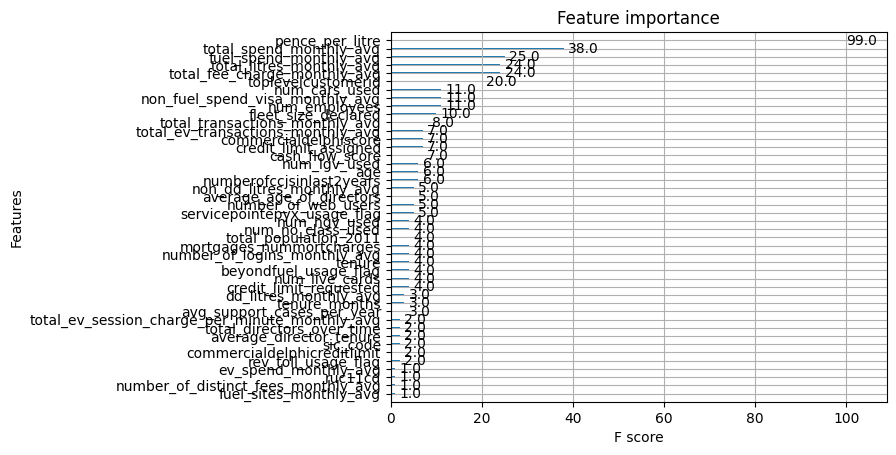

In [ ]:
# Set parameters for XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse'              # Root Mean Squared Error as evaluation metric
}

# Train XGBoost model
model = xgb.train(params, dtrain)

# Plot feature importance
xgb.plot_importance(model)
plt.show()

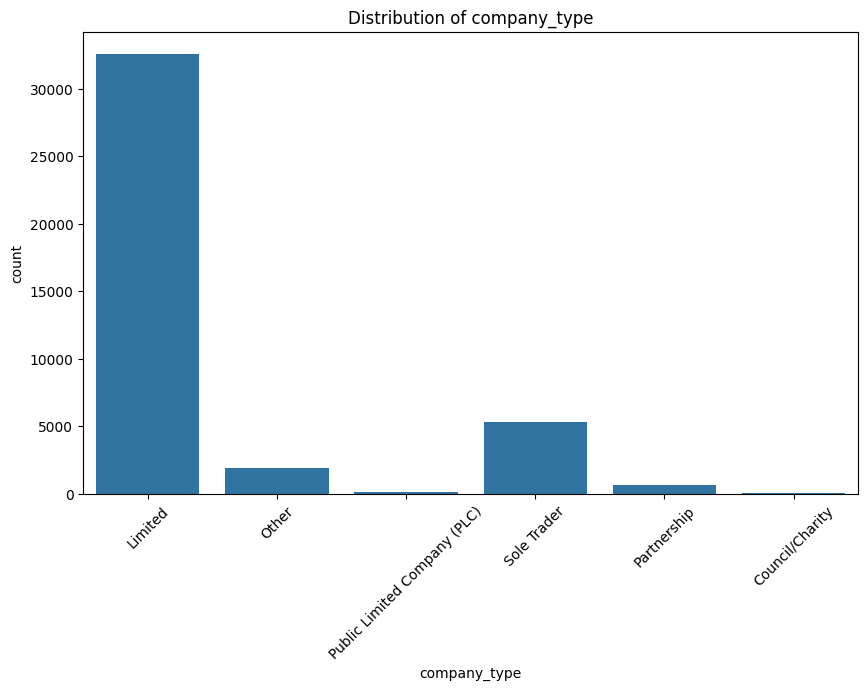

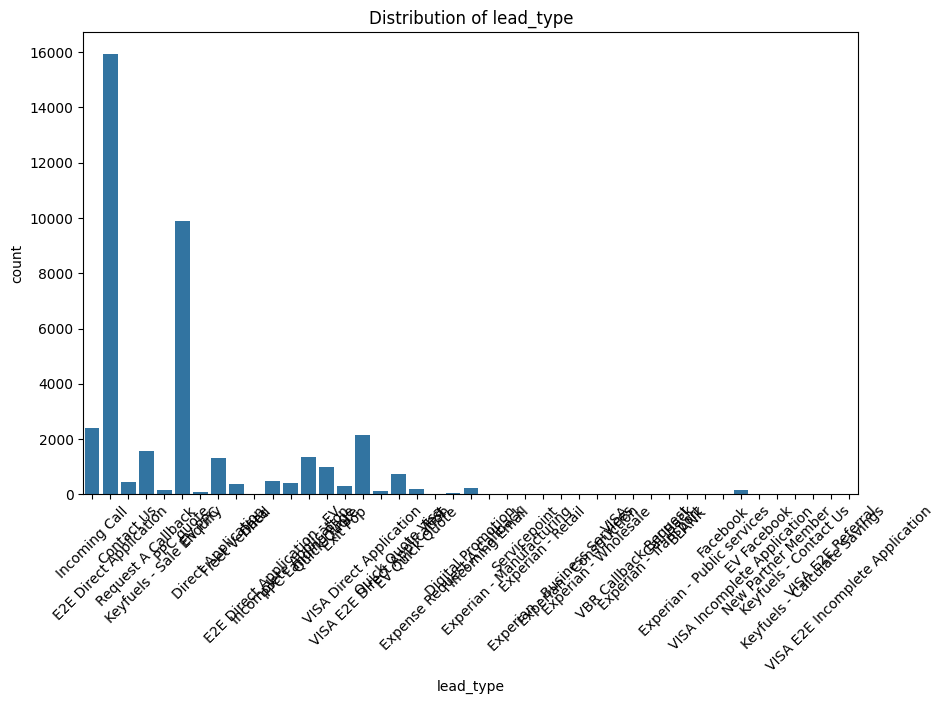

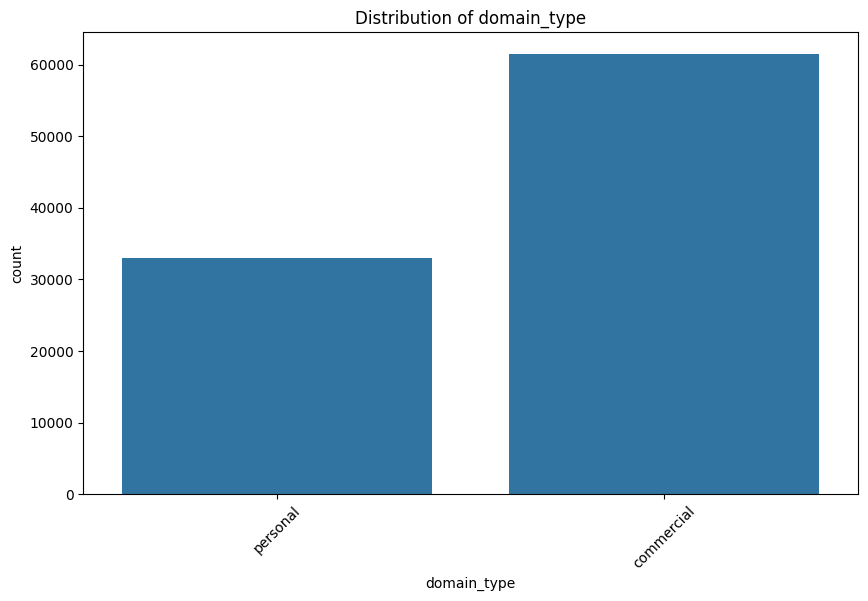

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categirc features
categorical_cols = ['company_type', 'lead_type', 'domain_type']

# Create countplot for categoric features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data_mart_df_2)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from datetime import date
import holidays

# Load UK holidays
uk_holidays = holidays.UnitedKingdom()

# Get all holidays in a specific year
year = 2016
uk_holidays_in_year = holidays.UnitedKingdom(years=year)

# Check if a specific date is a holiday
specific_date = date(2016, 1, 1)
is_holiday = specific_date in uk_holidays

# Print all holidays in the year
print(f"Holidays in {year}:")
for holiday_date, holiday_name in sorted(uk_holidays_in_year.items()):
    print(f"{holiday_date}: {holiday_name}")

# Print whether a specific date is a holiday
print(f"\nIs {specific_date} a holiday in the UK? {is_holiday}")


Holidays in 2016:
2016-01-01: New Year's Day
2016-03-25: Good Friday
2016-05-02: May Day
2016-05-30: Spring Bank Holiday
2016-12-25: Christmas Day
2016-12-26: Boxing Day
2016-12-27: Christmas Day (observed)

Is 2016-01-01 a holiday in the UK? True


In [ ]:
import pandas as pd
import holidays
from datetime import date

# Load UK holidays
uk_holidays = holidays.UnitedKingdom()

# Function to check if a date is a holiday
def is_holiday(date_value):
    return date_value in uk_holidays

# Example DataFrame
data = {'last_transaction_date': ['2019-10-06', '2019-12-25', '2019-01-01']}
df = pd.DataFrame(data)
df['last_transaction_date'] = pd.to_datetime(df['last_transaction_date'])

# Apply the function to create a holiday flag column
df['is_holiday'] = df['last_transaction_date'].apply(is_holiday).astype(int)

print(df)


  last_transaction_date  is_holiday
0            2019-10-06           0
1            2019-12-25           1
2            2019-01-01           1


In [ ]:
data_mart_df_2['last_transaction_date'].isnull().sum()

22152

In [ ]:
brexit_date = '23/06/2016'
data_mart_df_V3 = data_mart_df_2[data_mart_df_2.start_date >= brexit_date].copy()
data_mart_df_V3['last_transaction_date'].isnull().sum()

21620

In [ ]:
data_mart_df_V3.start_date.isnull().sum()

0

In [ ]:
#data_mart_df_2.last_transaction_date
data_mart_df_V3['is_holiday'] = data_mart_df_V3['start_date'].apply(is_holiday).astype(int)
data_mart_df_V3[['is_holiday', 'start_date']].head()

,is_holiday,start_date
7492,0,2016-06-23
7493,0,2016-06-23
7495,0,2016-06-23
7496,0,2016-06-23
7497,0,2016-06-23


In [ ]:
data_mart_df_V3['is_holiday'].value_counts()

is_holiday
0    76455
1      169
Name: count, dtype: int64